In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle

In [ ]:
embeddings_dict = {}

with open("glove.840B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
        except:
            pass
print('Embeddings dict length:', len(embeddings_dict))

count = 0
keys_to_del = []
for key in embeddings_dict.keys():
    vector = embeddings_dict[key]
    if vector.shape[0] != 300:
        keys_to_del.append(key)
        count += 1

print('Vectors not well dimensioned:', count)
for key in keys_to_del:
    del embeddings_dict[key]
print('Final embeddings dict length:', len(embeddings_dict))

In [51]:
with open('glove_embed_model.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

#### Some additional code and tests

In [17]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [42]:
print(find_closest_embeddings(embeddings_dict["king"])[1:6])    # [:5] or [1:6] as first word is the same word

#print(find_closest_embeddings(
#    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"])[:5])

['kings', 'prince', 'King', 'queen', 'throne']


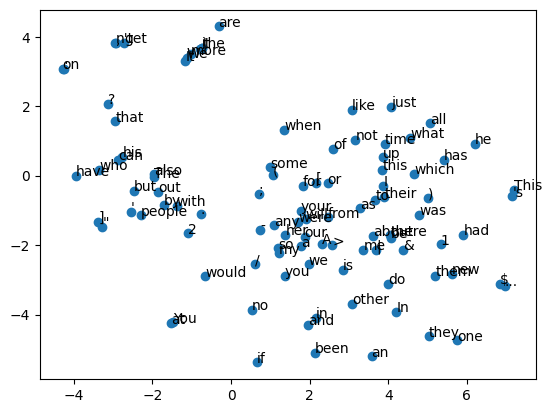

In [48]:
tsne = TSNE(n_components=2, random_state=0)
#words = ["sister", "brother", "man", "woman", "uncle", "aunt"]
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(np.array(vectors[200:300]))      # How many vectors to visualize
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [67]:
with open('unks_dict.pkl', 'rb') as f:
        unks_dict = pickle.load(f)

In [68]:
len(unks_dict)
unks_list = list(unks_dict.keys())
#print(unks_list)

alpha_unks = []
for unk in unks_list:
    if not unk.isnumeric():
        alpha_unks.append(unk)
print('alpha unks length: ', len(alpha_unks))
print(alpha_unks)

alpha unks length:  52
['to', 'of', 'a', 'Wednesdey', 'and', 'loggin', 'recognised', 'realise', 'departmentl', 'actss', 'erro', 'Ouvriere', 'A920', '48km', 'US30YT', 'refuelling', 'abount', 'Tonapi', 'Pitke', 'Hajdukovic', 'SmarNet', 'SunnCom', 'impregnations', 'morging', 'begunn', 'audico', 'taikong', 'US10YT', 'officialas', 'Supoyo', 'gox', 'bitcoin', ',', 'bitcoins', 'fertiliser', '.', '-', ':', "'", '[', ']', '/', '{', 'year-old', 'as-usual', 'in-One', "advertised'", 'poultry,', 'butter,', 'at-large', '<', 'in-law']
